### Install Necessary Libraries

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping


### Load and Augment Data

In [2]:
# Path to dataset
train_dir = 'train/'
val_dir = 'test/'

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    color_mode="grayscale",
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(48, 48),
    batch_size=32,
    color_mode="grayscale",
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Preview Data

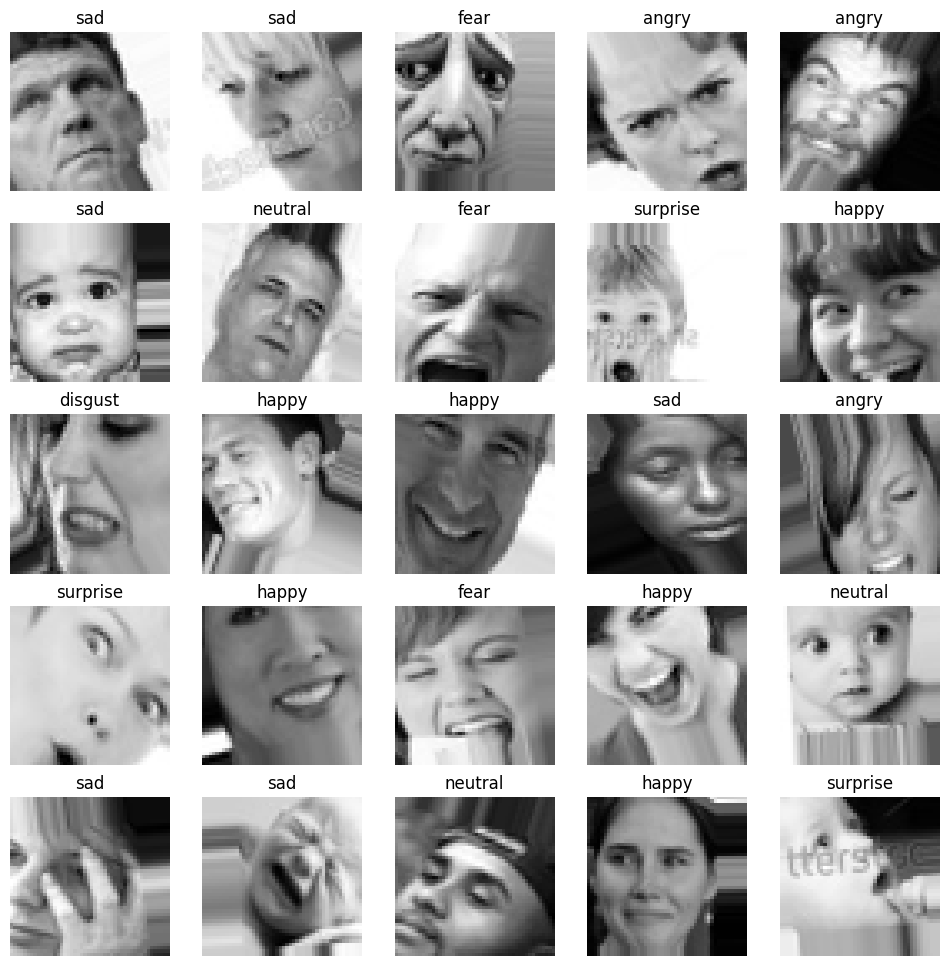

In [3]:
# Function to display a grid of sample images
def display_sample_images(generator, class_names):
    x, y = next(generator)
    plt.figure(figsize=(12, 12))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(x[i].reshape(48, 48), cmap='gray')
        plt.title(class_names[np.argmax(y[i])])
        plt.axis('off')
    plt.show()

class_names = list(train_generator.class_indices.keys())
display_sample_images(train_generator, class_names)


### Build the Model

In [4]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(48, 48, 1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # Assuming 7 emotion classes
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.n // val_generator.batch_size,
    epochs=50
)


C:\Users\mano\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 341s 374ms/step - accuracy: 0.2418 - loss: 1.8335 - val_accuracy: 0.2542 - val_loss: 1.7694
Epoch 2/50
  1/897 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 0.3125 - loss: 1.7464

C:\Users\mano\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3125 - loss: 1.7464 - val_accuracy: 0.2542 - val_loss: 1.7671
Epoch 3/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 103s 115ms/step - accuracy: 0.2541 - loss: 1.7843 - val_accuracy: 0.2899 - val_loss: 1.7203
Epoch 4/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2188 - loss: 1.8550 - val_accuracy: 0.2923 - val_loss: 1.7164
Epoch 5/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 52s 58ms/step - accuracy: 0.2720 - loss: 1.7576 - val_accuracy: 0.3022 - val_loss: 1.6938
Epoch 6/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2812 - loss: 1.7528 - val_accuracy: 0.3033 - val_loss: 1.6894
Epoch 7/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 0.2869 - loss: 1.7343 - val_accuracy: 0.3521 - val_loss: 1.6398
Epoch 8/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3438 - loss: 1.7063 - val_accuracy: 0.3352 - val_loss: 1.6628
Epoch 9/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 52s 58ms/step - accuracy: 0.3118 - loss: 1.6942 - val_accuracy: 0.3

### Evaluate the Model

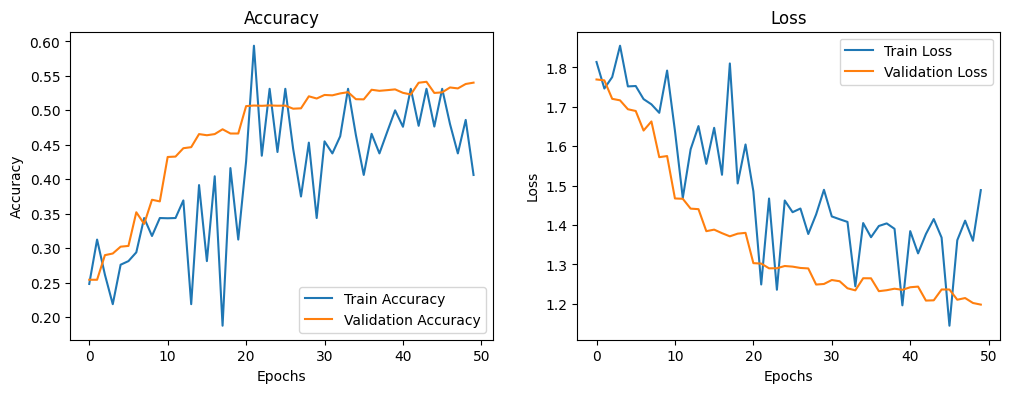

225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step
Confusion Matrix


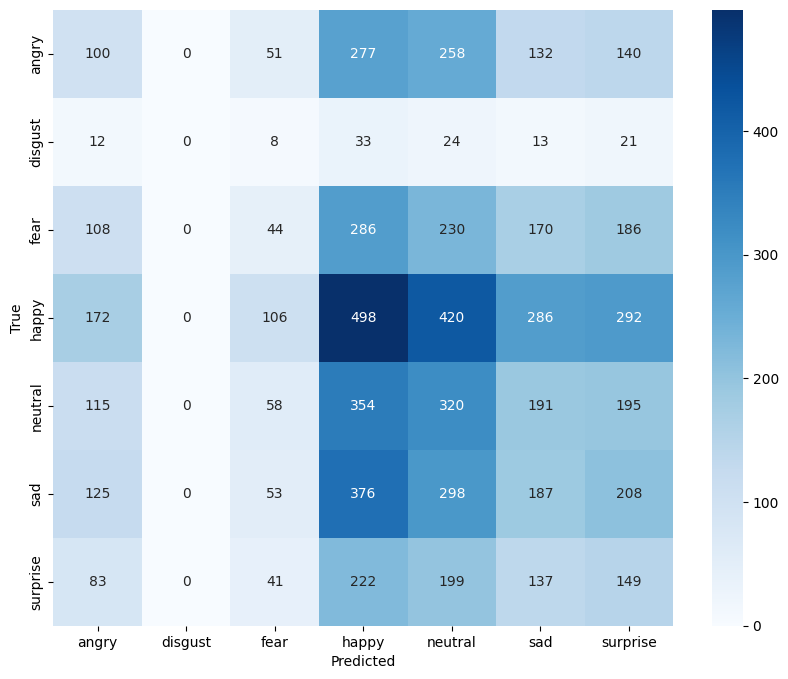

Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.10      0.12       958
     disgust       0.00      0.00      0.00       111
        fear       0.12      0.04      0.06      1024
       happy       0.24      0.28      0.26      1774
     neutral       0.18      0.26      0.21      1233
         sad       0.17      0.15      0.16      1247
    surprise       0.13      0.18      0.15       831

    accuracy                           0.18      7178
   macro avg       0.14      0.15      0.14      7178
weighted avg       0.17      0.18      0.17      7178



C:\Users\mano\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mano\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mano\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [6]:
# Plot accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history)

# Confusion Matrix and Classification Report
val_generator.reset()
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(val_generator.classes, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print('Classification Report')
print(classification_report(val_generator.classes, y_pred, target_names=class_names))


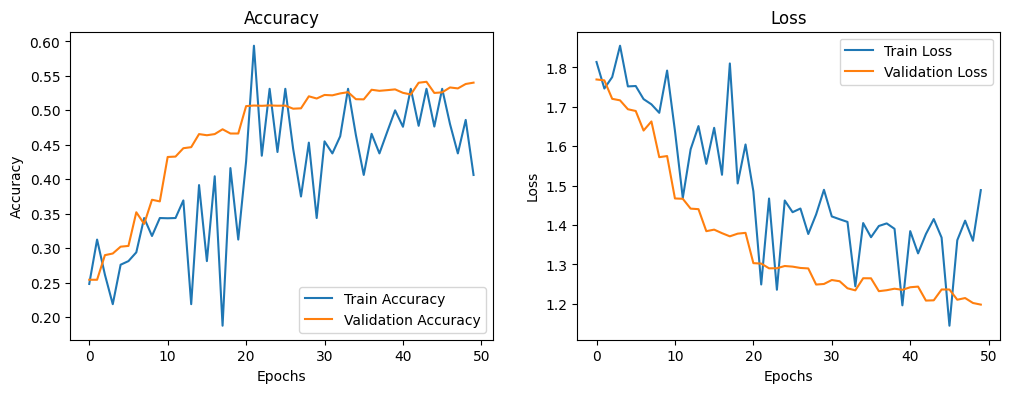

225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.5426 - loss: 1.1992
Final Validation Accuracy: 54.01%


In [7]:
# Plot accuracy and loss over epochs
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_history(history)

# Evaluate the final model accuracy on the validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f"Final Validation Accuracy: {val_acc*100:.2f}%")


In [8]:
# Save the model
model.save('emotion_detection_model.h5')
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('emotion_detection_model.h5')



In [2]:
import cv2
import numpy as np
import tensorflow as tf
from tkinter import Tk, Label, Button
from PIL import Image, ImageTk

# Load the trained emotion detection model
model = tf.keras.models.load_model('emotion_detection_model.h5')

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Labels for emotion classes (ensure this matches your model's output)
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Initialize Tkinter GUI
root = Tk()
root.title("Emotion Detection")

# Create a label to display the camera feed
label_widget = Label(root)
label_widget.pack()

# Function to detect emotions
def detect_emotion(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(
        gray, scaleFactor=1.1, minNeighbors=5, minSize=(60, 60)
    )

    for (x, y, w, h) in faces:
        # Extract the region of interest (ROI) corresponding to the face
        roi_gray = gray[y:y + h, x:x + w]

        # Resize the ROI to match the model's expected input size (48x48)
        resized = cv2.resize(roi_gray, (48, 48))
        normalized = resized / 255.0  # Normalize the image
        reshaped = np.reshape(normalized, (1, 48, 48, 1))

        # Predict the emotion
        prediction = model.predict(reshaped)
        max_index = int(np.argmax(prediction))
        emotion = class_names[max_index]
        color = (255, 0, 0)  # Color for the rectangle and text

        # Draw bounding box and label
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
        cv2.putText(
            frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
            0.9, color, 2
        )

    return frame

# Function to update the camera feed in the GUI
def update_camera():
    ret, frame = cap.read()
    if ret:
        # Detect emotions
        frame = detect_emotion(frame)

        # Convert the frame to RGB format
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(frame_rgb)
        imgtk = ImageTk.PhotoImage(image=img)

        # Update the label with the new frame
        label_widget.imgtk = imgtk
        label_widget.configure(image=imgtk)

    # Repeat the function after 10 milliseconds
    label_widget.after(10, update_camera)

# Function to start the camera feed
def start_camera():
    global cap
    cap = cv2.VideoCapture(0)  # Use 0 for default camera
    update_camera()

# Function to stop the camera feed
def stop_camera():
    if 'cap' in globals():
        if cap.isOpened():
            cap.release()
    root.destroy()

# Add buttons to start and stop the camera
start_button = Button(root, text="Start Camera", command=start_camera)
start_button.pack()

stop_button = Button(root, text="Stop Camera", command=stop_camera)
stop_button.pack()

# Start the Tkinter main loop
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━